<a href="https://colab.research.google.com/github/MWFK/NLP-from-Zero-to-Hero/blob/main/2_CNN_on_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Licensed under the Apache License, Version 2.0 (the "License");

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [8]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [9]:
tokenizer = info.features['text'].encoder

In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)) # train_dataset.output_shapes does not work
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))    # it has been depreciated in the latest version of TensorFlow

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 36ms/step - loss: 0.5802 - accuracy: 0.6640 - val_loss: 0.3136 - val_accuracy: 0.8786
Epoch 2/10
391/391 [==============================] - 14s 34ms/step - loss: 0.2394 - accuracy: 0.9101 - val_loss: 0.3098 - val_accuracy: 0.8790
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 0.1734 - accuracy: 0.9373 - val_loss: 0.3405 - val_accuracy: 0.8749
Epoch 4/10
391/391 [==============================] - 14s 34ms/step - loss: 0.1318 - accuracy: 0.9532 - val_loss: 0.3746 - val_accuracy: 0.8711
Epoch 5/10
391/391 [==============================] - 14s 34ms/step - loss: 0.1065 - accuracy: 0.9653 - val_loss: 0.4145 - val_accuracy: 0.8657
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0847 - accuracy: 0.9737 - val_loss: 0.5243 - val_accuracy: 0.8589
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0653 - accuracy: 0.9813 - val_loss: 0.5769 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

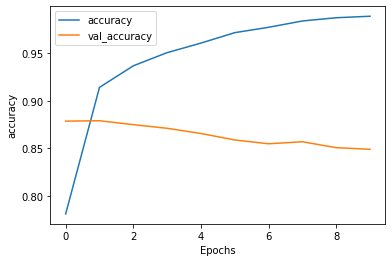

In [14]:
plot_graphs(history, 'accuracy')

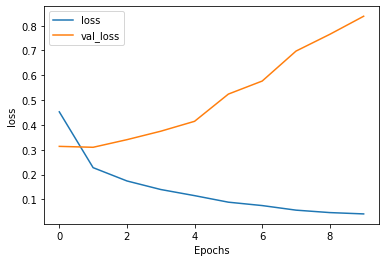

In [15]:
plot_graphs(history, 'loss')